# PI² A5: Credit Risk

In [120]:
import pandas as pd
import numpy as np

#Graphique
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling
from sklearn.linear_model import LogisticRegression
from xgboost              import XGBClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm          import SVC
from sklearn.ensemble     import RandomForestClassifier

import sklearn.discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Outils

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.feature_selection     import SelectKBest, f_classif, RFE
from sklearn.preprocessing         import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics               import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

In [121]:
#Confusion matrix
def get_cm(model, y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel("Prédictions")
    plt.ylabel("Originals")
    plt.title(f"Modèle {model}\nAccuracy:{accuracy_score(y_test, y_pred):.3f}")
    plt.show()

## Lecture des données

In [82]:
%%time
df = pd.read_excel('Dataset_light.xlsx',index_col=0)  
df

Wall time: 32.8 s


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0


In [83]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [84]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## Data Featuring

Ici on regarde la colonne cible

In [85]:
type(df['SeriousDlqin2yrs'][1])

numpy.int64

In [86]:
print(df['SeriousDlqin2yrs'].value_counts())

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


In [87]:
print(df['SeriousDlqin2yrs'].value_counts()/df.shape[0] *100)

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64


Ici on regarde les valeurs nulles

In [88]:
df.isnull().values.any()

True

In [89]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
Age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [90]:
df.shape

(150000, 11)

In [91]:
df["MonthlyIncome"].median()

5400.0

In [92]:
df['NumberOfDependents'].median()

0.0

On remplace les valeurs par la médiane

In [93]:
df['MonthlyIncome'].fillna((df['MonthlyIncome'].median()), inplace=True)

In [94]:
df['NumberOfDependents'].fillna((df['NumberOfDependents'].median()), inplace=True)

In [95]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
Age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Ici on regarde les valeurs aberrantes

In [96]:
df['NumberOfTime30-59DaysPastDueNotWorse'].describe()
# max : 98 but median is 0 ??

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [97]:
df[(df['NumberOfTime30-59DaysPastDueNotWorse'] > 12)].count()[0]
# we have lony 270 value > 12 but there are 150 000 values ?

270

In [98]:
df[(df['NumberOfTime30-59DaysPastDueNotWorse'] < 80)  & (df['NumberOfTime30-59DaysPastDueNotWorse'] > 12)].count()[0]
# only 1 value between 12 and 80 , there are 269 value > 80

1

In [99]:
df[(df['NumberOfTime30-59DaysPastDueNotWorse'] > 80)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,
1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2287,0,1.0,22,98,0.0,5400.0,0,98,0,98,0.0
3885,0,1.0,38,98,12.0,5400.0,0,98,0,98,0.0
4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147775,1,1.0,68,98,255.0,5400.0,0,98,0,98,0.0
149154,1,1.0,24,98,54.0,5400.0,0,98,0,98,0.0
149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0


In [100]:
#We see only 98 as value
df[(df['NumberOfTime30-59DaysPastDueNotWorse'] == 12)]
# 264 value = 98 must be a mistake 
# we gonna change the 269 values to 14 with is the max (98 as no sense tho)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,
4541,1,0.982253,50,12,0.529790,4044.0,15,0,0,1,0.0
57971,0,0.314147,40,12,0.244543,8750.0,12,0,1,1,0.0


In [101]:
# same check for NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse
df[(df['NumberOfTimes90DaysLate'] > 17)].count()[0]
# Same result but with value 17 (we already see in previous table that these columns have same problem)

269

In [102]:
df[(df['NumberOfTime60-89DaysPastDueNotWorse'] > 11)].count()[0]
# Same result but with value 11

269

In [103]:
# Let's see if it's the same line for the same problem
df[(df['NumberOfTime60-89DaysPastDueNotWorse'] > 11) & (df['NumberOfTimes90DaysLate'] > 17) & (df['NumberOfTime30-59DaysPastDueNotWorse'] > 12)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,
1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2287,0,1.0,22,98,0.0,5400.0,0,98,0,98,0.0
3885,0,1.0,38,98,12.0,5400.0,0,98,0,98,0.0
4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147775,1,1.0,68,98,255.0,5400.0,0,98,0,98,0.0
149154,1,1.0,24,98,54.0,5400.0,0,98,0,98,0.0
149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0


In [104]:
#It's exactly the same line let's replace these values 
#NumberOfTime30-59DaysPastDueNotWorse -> 12
#NumberOfTimes90DaysLate  -> 18
#NumberOfTime60-89DaysPastDueNotWorse -> 13

df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] > 12, 'NumberOfTime30-59DaysPastDueNotWorse'] = 12
df.loc[df['NumberOfTimes90DaysLate'] > 18, 'NumberOfTimes90DaysLate'] = 18
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] > 13, 'NumberOfTime60-89DaysPastDueNotWorse'] = 13



In [105]:
# Let's see if it's the same line for the same problem
df[(df['NumberOfTime60-89DaysPastDueNotWorse'] > 11) & (df['NumberOfTimes90DaysLate'] > 17) & (df['NumberOfTime30-59DaysPastDueNotWorse'] > 12)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,


Regardons maintenant les corrélations

In [106]:
corr_matrix = df.corr()
print(corr_matrix["SeriousDlqin2yrs"].sort_values(ascending=False))

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.269240
NumberOfTimes90DaysLate                 0.236970
NumberOfTime60-89DaysPastDueNotWorse    0.207152
NumberOfDependents                      0.046869
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.017151
NumberOfOpenCreditLinesAndLoans        -0.029669
Age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64


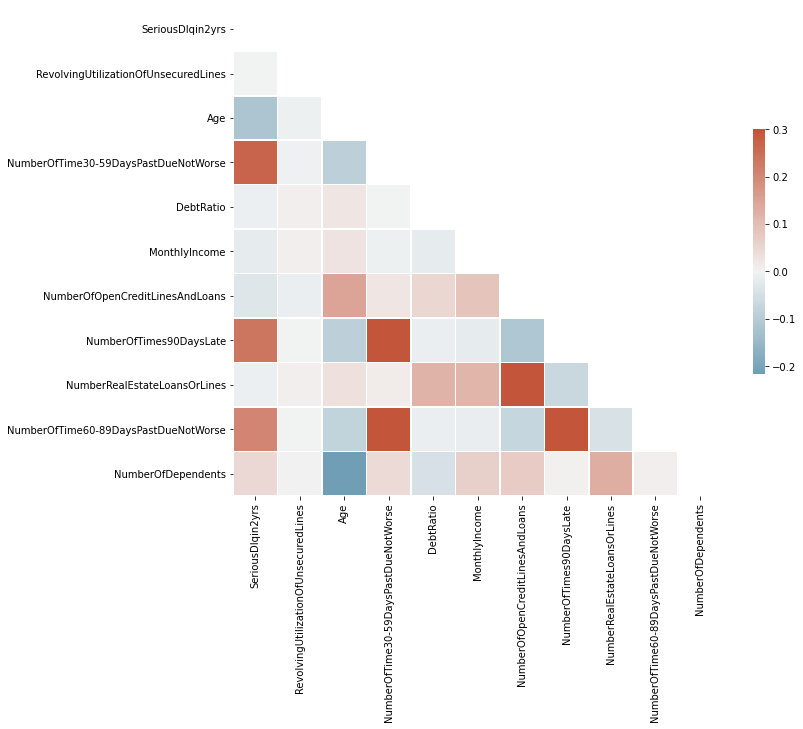

In [108]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Interessons nous aux dernières features

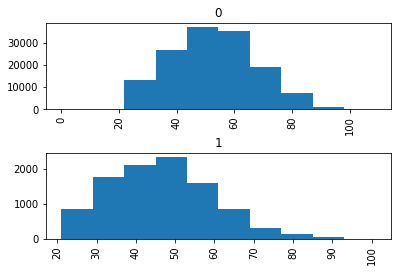

In [109]:
age_hist = df['Age'].hist(by=df['SeriousDlqin2yrs'], layout=(2,1))

(0.0, 500000.0)

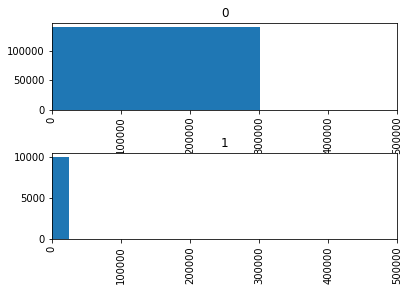

In [110]:
MIncome_hist = df['MonthlyIncome'].hist(by=df['SeriousDlqin2yrs'], layout=(2,1))
MIncome_hist[0].set_xlim((0,500000))
MIncome_hist[1].set_xlim((0,500000))

(0.0, 20.0)

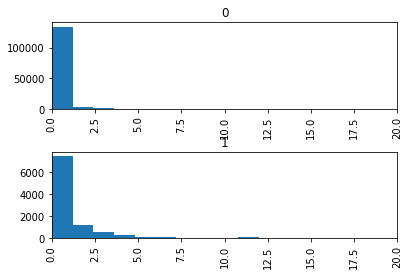

In [111]:
NumberOfTime30_59DaysPastDueNotWorse_hist = df['NumberOfTime30-59DaysPastDueNotWorse'].hist(by=df['SeriousDlqin2yrs'], layout=(2,1))
NumberOfTime30_59DaysPastDueNotWorse_hist[0].set_xlim((0,20))
NumberOfTime30_59DaysPastDueNotWorse_hist[1].set_xlim((0,20))

In [112]:
df.groupby('NumberOfTime30-59DaysPastDueNotWorse').count()
# seuil de défault 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
NumberOfTime30-59DaysPastDueNotWorse,,,,,,,,,,
0,126018,126018,126018,126018,126018,126018,126018,126018,126018,126018
1,16033,16033,16033,16033,16033,16033,16033,16033,16033,16033
2,4598,4598,4598,4598,4598,4598,4598,4598,4598,4598
3,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754
4,747,747,747,747,747,747,747,747,747,747
5,342,342,342,342,342,342,342,342,342,342
6,140,140,140,140,140,140,140,140,140,140
7,54,54,54,54,54,54,54,54,54,54
8,25,25,25,25,25,25,25,25,25,25


In [114]:
#dataset avec 3 colonnes en moins
df2 = df[['SeriousDlqin2yrs','Age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', "MonthlyIncome", "NumberOfDependents"]].copy()
df2.head()

,SeriousDlqin2yrs,Age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfDependents
Index,,,,,,,,
1,1,45,2,0,0,13,9120.0,2.0
2,0,40,0,0,0,4,2600.0,1.0
3,0,38,1,1,0,2,3042.0,0.0
4,0,30,0,0,0,5,3300.0,0.0
5,0,49,1,0,0,7,63588.0,0.0


Train et test split

In [117]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.iloc[:,1:], df2.iloc[:,0], stratify = df2["SeriousDlqin2yrs"] , random_state=662020, test_size=0.3)

In [134]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], stratify = df["SeriousDlqin2yrs"] , random_state=662020, test_size=0.3)

## Modeling

Regression logistique

In [135]:
logreg = LogisticRegression(max_iter = 150000)
logreg.fit(x_train,y_train)

# predict
y_pred=logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

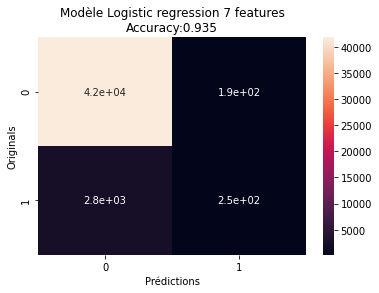

In [136]:
get_cm("Logistic regression 7 features",y_test ,y_pred)

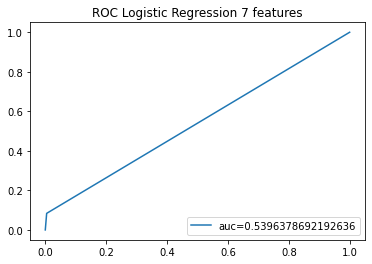

In [137]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Logistic Regression 7 features")
plt.show()

In [140]:
compt = 0
for i in y_pred:
    if i == 1:
        compt += 1 
        
compt
# 397 -> 10 000  de base 

441

In [141]:
#Avec df2

In [142]:
logreg2 = LogisticRegression(max_iter = 150000)
logreg2.fit(x_train2,y_train2)

y_pred2=logreg2.predict(x_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))

Accuracy: 0.9338888888888889
Precision: 0.539568345323741
Recall: 0.07480053191489362


In [147]:
compt = 0
for i in y_pred2:
    if i == 1:
        compt += 1 
        
compt
# 445 -> 10 000  de base , grosse erreur sur les prédictions

417

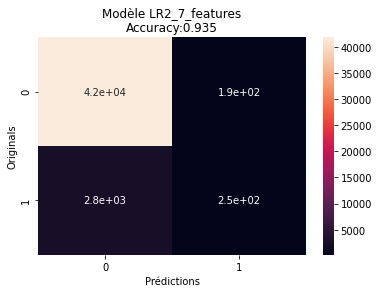

In [148]:
get_cm("LR2_7_features",y_test,y_pred)

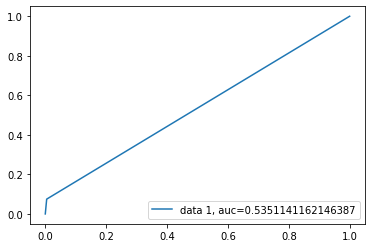

In [149]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred2)
auc = metrics.roc_auc_score(y_test, y_pred2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# ça ne change pas grand chose

Debut des test avec la cross validation

In [152]:
auc_scores = cross_val_score(LogisticRegression(max_iter = 150000),x_train,y_train,cv=5,scoring=make_scorer(roc_auc_score))
auc_scores.mean()

0.5436009304885885

In [153]:
pre_scores_lg = cross_val_score(LogisticRegression(max_iter = 150000),x_train,y_train,cv=5,scoring="accuracy")
pre_scores_lg.mean()

0.9352857142857143

In [154]:
auc_scores_knn = cross_val_score(KNeighborsClassifier(3),x_train,y_train,cv=5,scoring=make_scorer(roc_auc_score))
auc_scores_knn.mean()

0.5153307680601684

In [155]:
pre_scores_knn = cross_val_score(KNeighborsClassifier(3),x_train,y_train,cv=5,scoring="accuracy")
pre_scores_knn.mean()

0.9272095238095238

In [156]:
auc_scores_qda = cross_val_score(QuadraticDiscriminantAnalysis(),x_train,y_train,cv=5,scoring=make_scorer(roc_auc_score))
auc_scores_qda.mean()

0.7078090667638509

In [157]:
pre_scores_qda = cross_val_score(QuadraticDiscriminantAnalysis(),x_train,y_train,cv=5,scoring="accuracy")
pre_scores_qda.mean()

0.899942857142857

In [158]:
auc_scores_lda = cross_val_score(LinearDiscriminantAnalysis(),x_train,y_train,cv=5,scoring=make_scorer(roc_auc_score))
auc_scores_lda.mean()

0.5659963202916602

In [160]:
pre_scores_lda = cross_val_score(LinearDiscriminantAnalysis(),x_train,y_train,cv=5,scoring="accuracy")
pre_scores_lda.mean()

0.9341238095238096

In [161]:
pre_scores_RF = cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5,scoring="accuracy")
pre_scores_RF

array([0.9367619 , 0.93595238, 0.93438095, 0.93566667, 0.93380952])

In [162]:
auc_scores_RF = cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5,scoring=make_scorer(roc_auc_score))
auc_scores_RF.mean()

0.5924161179708298

### Cross validation sur 8 modèles différents: avec deux scaler essayer

Précision

In [163]:
def select_model(X, y, seed):
    
    models = []
    models.append(("LR", LogisticRegression(max_iter = 150000)))
    models.append(("LDA", LinearDiscriminantAnalysis()))
    models.append(("QDA", QuadraticDiscriminantAnalysis()))
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("CART", DecisionTreeClassifier()))
    models.append(("NB", GaussianNB()))
    models.append(("SVM", SVC()))
    models.append(("RFC", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))

    
    results = []
    names = []
    for name, model in models:
        #rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    for i in range(len(results)):
        print('%s: %f (%f)' % (names[i], results[i].mean(), results[i].std()))
    
    
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')
    plt.show()
    
    return results

In [164]:
results_to_plot = []
seed = 31

c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

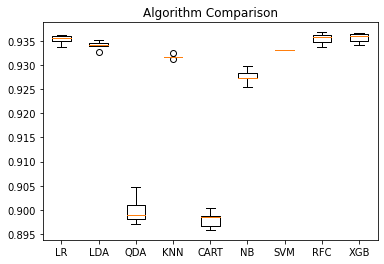

In [165]:
results = select_model(x_train, y_train, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("base")
results_to_plot.append(results)

c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

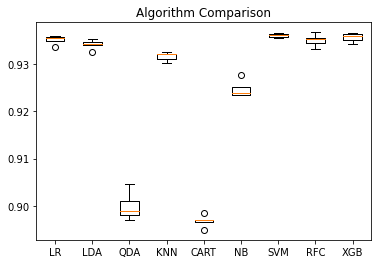

In [166]:
scaler = MinMaxScaler()
x_train_min = scaler.fit_transform(x_train)
results = select_model(x_train_min, y_train, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Min")
results_to_plot.append(results)

c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

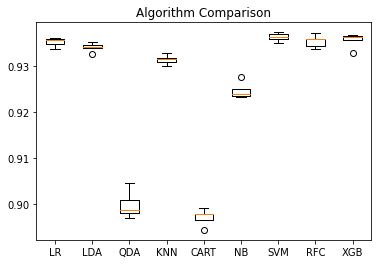

In [167]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
results = select_model(x_train_std, y_train, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Stand")
results_to_plot.append(results)

In [168]:
results_to_plot

[[0.9352857142857143,
  0.9341238095238096,
  0.899942857142857,
  0.9317428571428572,
  0.8980095238095238,
  0.9276095238095238,
  0.9331619047619049,
  0.9354476190476191,
  0.9356095238095239,
  'base'],
 [0.935047619047619,
  0.9341238095238096,
  0.899942857142857,
  0.9315523809523809,
  0.8967809523809525,
  0.9246857142857141,
  0.9360190476190476,
  0.9350190476190476,
  0.9355809523809524,
  'Min'],
 [0.9352285714285713,
  0.9341238095238096,
  0.899942857142857,
  0.9313904761904762,
  0.897247619047619,
  0.9246857142857141,
  0.9362857142857143,
  0.9354190476190476,
  0.9356190476190477,
  'Stand']]

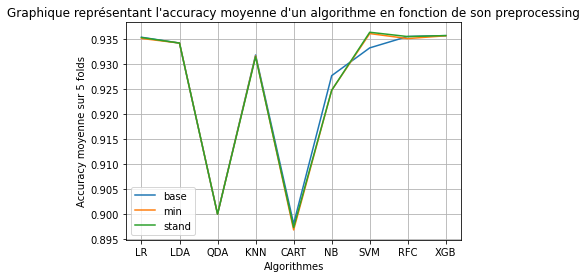

In [169]:
cols_names = ["LR", "LDA", "QDA", "KNN", "CART", "NB", "SVM", "RFC", "XGB","name"]
results_to_plot = pd.DataFrame(results_to_plot, columns = cols_names)
to_plot = results_to_plot.set_index("name").T
to_plot = to_plot.reset_index()
to_plot.columns = [ "algo", "base", "min", "stand"]
ax = to_plot.plot(xticks = to_plot.index, grid = True)
ax.set_xticklabels(to_plot.algo)
plt.xlabel("Algorithmes")
plt.ylabel("Accuracy moyenne sur 5 folds")
plt.title("Graphique représentant l'accuracy moyenne d'un algorithme en fonction de son preprocessing")
plt.show()

AUC

In [170]:
def select_model_auc(X, y, seed):
    
    models = []
    models.append(("LR", LogisticRegression(max_iter = 150000)))
    models.append(("LDA", LinearDiscriminantAnalysis()))
    models.append(("QDA", QuadraticDiscriminantAnalysis()))
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("CART", DecisionTreeClassifier()))
    models.append(("NB", GaussianNB()))
    models.append(("SVM", SVC()))
    models.append(("RFC", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))
    
    results = []
    names = []
    for name, model in models:
        #rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=5, scoring=make_scorer(roc_auc_score))
        results.append(cv_results)
        names.append(name)
        #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    for i in range(len(results)):
        print('%s: %f (%f)' % (names[i], results[i].mean(), results[i].std()))
    
    
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')
    plt.show()
    
    return results

In [171]:
results_to_plot_auc = []
seed = 31

c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
numpy.linalg.LinAlgError: SVD did not converge

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LR: 0.543601 (0.003854)
LDA: nan (nan)
QDA: 0.707809 (0.009401)
KNN: 0.507706 (0.001730)
CART: 0.610464 (0.004374)
NB: 0.648355 (0.009207)
SVM: 0.500000 (0.000000)
RFC: 0.591119 (0.004324)
XGB: 0.597549 (0.003636)


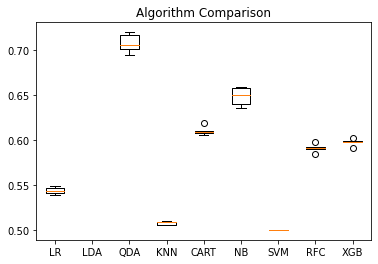

In [172]:
results = select_model_auc(x_train, y_train, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("base")
results_to_plot_auc.append(results)

c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LR: 0.538050 (0.004335)
LDA: 0.565996 (0.001484)
QDA: 0.707809 (0.009401)
KNN: 0.586379 (0.000715)
CART: 0.612787 (0.007220)
NB: 0.666500 (0.007529)
SVM: 0.544193 (0.002417)
RFC: 0.592476 (0.002811)
XGB: 0.597467 (0.003758)


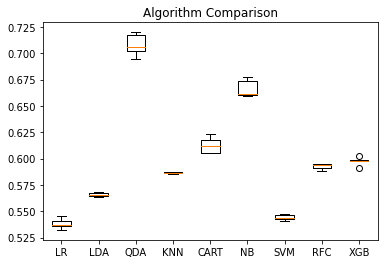

In [173]:
results = select_model_auc(x_train_min, y_train, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Min")
results_to_plot_auc.append(results)

c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jdelebec\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LR: 0.542115 (0.004968)
LDA: 0.565996 (0.001484)
QDA: 0.707809 (0.009401)
KNN: 0.592245 (0.002529)
CART: 0.611339 (0.004025)
NB: 0.666500 (0.007529)
SVM: 0.561930 (0.003582)
RFC: 0.590319 (0.002664)
XGB: 0.596430 (0.005675)


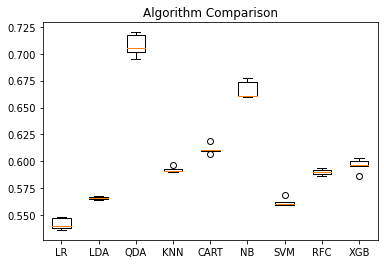

In [174]:
results = select_model_auc(x_train_std, y_train, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Stand")
results_to_plot_auc.append(results)

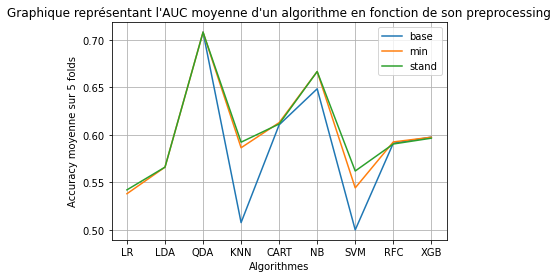

In [175]:
cols_names = ["LR", "LDA", "QDA", "KNN", "CART", "NB", "SVM" ,"RFC", "XGB","name"]
results_to_plot_auc = pd.DataFrame(results_to_plot_auc, columns = cols_names)
to_plot_auc = results_to_plot_auc.set_index("name").T
to_plot_auc = to_plot_auc.reset_index()
to_plot_auc.columns = [ "algo", "base", "min", "stand"]
ax_auc = to_plot_auc.plot(xticks = to_plot_auc.index, grid = True)
ax_auc.set_xticklabels(to_plot_auc.algo)
plt.xlabel("Algorithmes")
plt.ylabel("Accuracy moyenne sur 5 folds")
plt.title("Graphique représentant l'AUC moyenne d'un algorithme en fonction de son preprocessing")
plt.show()


In [176]:
to_plot_auc

,algo,base,min,stand
0,LR,0.543601,0.538050,0.542115
1,LDA,NaN,0.565996,0.565996
2,QDA,0.707809,0.707809,0.707809
3,KNN,0.507706,0.586379,0.592245
4,CART,0.610464,0.612787,0.611339
5,NB,0.648355,0.666500,0.666500
6,SVM,0.500000,0.544193,0.561930
7,RFC,0.591119,0.592476,0.590319
8,XGB,0.597549,0.597467,0.596430


## Optimisation

Des paramètres: par GridSearch

In [197]:
model = QuadraticDiscriminantAnalysis()
parameters = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# with GridSearch
qda = GridSearchCV(model, parameters)
qda.fit(x_train,y_train)
y_pred = qda.predict(x_test)

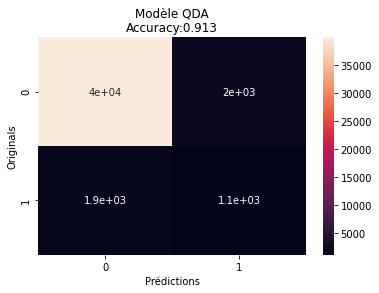

In [198]:
get_cm("QDA", y_test , y_pred)
# On, obtient une trés bonne accuracy

In [199]:
print(qda.best_params_)

{'reg_param': 0.1, 'store_covariance': True, 'tol': 0.0001}


In [200]:
model_final_qda = QuadraticDiscriminantAnalysis(reg_param = 0.1, store_covariance= True, tol= 0.0001)
model_final_qda.fit(x_train, y_train)
y_pred2 = model_final_qda.predict(x_test)
model_final_qda.score(x_test, y_test)

0.9126666666666666

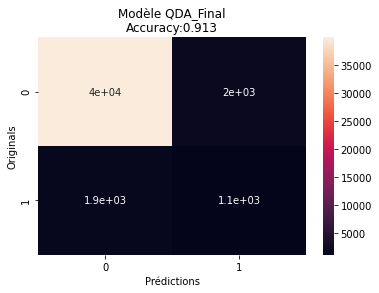

In [201]:
# même résultat, comme prévu
get_cm("QDA_Final", y_test , y_pred2)

In [202]:
x_train

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,
140235,0.277402,65,0,0.058645,14510.0,18,0,0,0,0.0
62502,0.083558,54,0,0.037306,13750.0,11,0,0,0,0.0
106056,1.000000,44,0,0.021192,2500.0,0,0,0,0,0.0
83370,0.477458,48,0,0.313413,16833.0,17,0,4,0,2.0
68117,1.000000,36,0,0.266382,701.0,0,0,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...
98289,1.000000,40,0,0.811556,3045.0,4,0,1,0,3.0
106640,0.020196,34,0,0.342025,6250.0,10,0,3,0,0.0
125863,0.112432,56,0,3.000999,1000.0,15,0,2,0,1.0


In [203]:
roc_qda = roc_auc_score(y_test,y_pred)
roc_qda

0.662781955934869

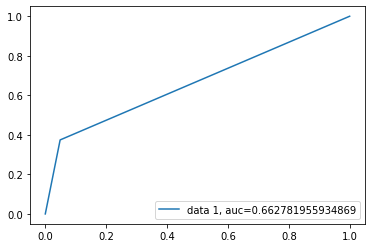

In [204]:
#On perd en auc
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred2)
auc = metrics.roc_auc_score(y_test, y_pred2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Des features par KBest

In [177]:
def search_KBest(nb_featues, model, X, y, scaler):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)
    results = []
    for i in range(1, nb_features+1):
        selector = SelectKBest(score_func=f_classif, k=i).fit(X_train, y_train)
        cols = selector.get_support(indices=True)
        X_train_selected = X_train.iloc[:, cols]
        X_train_selected_scaled = scaler.fit_transform(X_train_selected)
        model.fit(X_train_selected_scaled, y_train)
        X_test_selected = X_test.iloc[:, cols]
        X_test_selected_scaled = scaler.transform(X_test_selected)
        y_pred = model.predict(X_test_selected_scaled)
        acc = accuracy_score(y_test, y_pred)
        results.append([i, acc])
    results = pd.DataFrame(results, columns = ["K_features", "Accuracy"])
    return results

In [178]:
def select_KBest(k, X_train, y_train):
    
    selector = SelectKBest(score_func=f_classif, k=k).fit(X_train, y_train)
    cols = selector.get_support(indices=True)
    return cols

In [179]:
nb_features = x_train.shape[1]
scaler = StandardScaler()

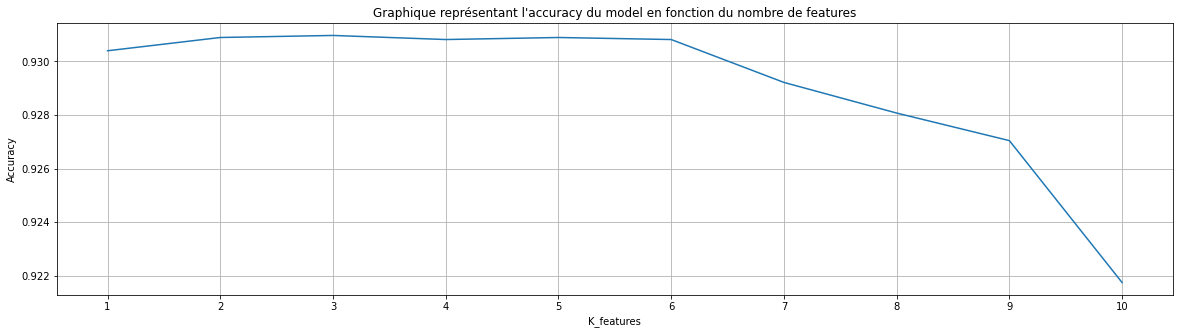

In [180]:
model =  QuadraticDiscriminantAnalysis(reg_param = 0.1, store_covariance= True, tol= 0.0001)
results = search_KBest(nb_features, model, x_train, y_train, scaler)
ax = results.plot(x = "K_features", 
                  y = "Accuracy", 
                  grid = True, 
                  xticks=results.K_features, 
                  figsize=(20, 5))
ax.get_legend().remove()
plt.xlabel("K_features")
plt.ylabel("Accuracy")
plt.title("Graphique représentant l'accuracy du model en fonction du nombre de features")
plt.show()

In [181]:
x_train2 = x_train.copy()
x_test2 = x_test.copy()

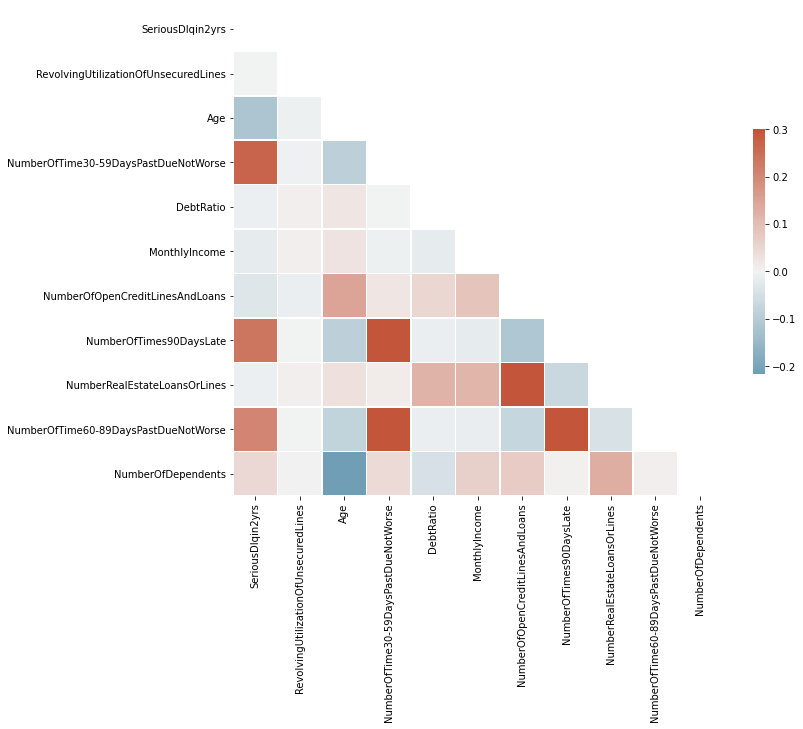

In [186]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### On retire les 3 colonnes les moins corrélés

In [182]:
del x_train2["RevolvingUtilizationOfUnsecuredLines"]
del x_train2["NumberOfDependents"]
del x_train2["NumberRealEstateLoansOrLines"]
del x_train2["NumberOfOpenCreditLinesAndLoans"]

In [183]:
x_train2

,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
Index,,,,,,
140235,65,0,0.058645,14510.0,0,0
62502,54,0,0.037306,13750.0,0,0
106056,44,0,0.021192,2500.0,0,0
83370,48,0,0.313413,16833.0,0,0
68117,36,0,0.266382,701.0,0,0
...,...,...,...,...,...,...
98289,40,0,0.811556,3045.0,0,0
106640,34,0,0.342025,6250.0,0,0
125863,56,0,3.000999,1000.0,0,0


In [184]:
del x_test2["RevolvingUtilizationOfUnsecuredLines"]
del x_test2["NumberOfDependents"]
del x_test2["NumberRealEstateLoansOrLines"]
del x_test2["NumberOfOpenCreditLinesAndLoans"]

In [185]:
x_test2

,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
Index,,,,,,
27440,30,2,0.190979,3125.0,0,2
12219,59,0,0.071415,15500.0,0,0
81184,68,0,30.000000,5400.0,0,0
13743,47,0,0.665992,8400.0,0,0
100275,53,0,0.439720,12416.0,0,0
...,...,...,...,...,...,...
17765,53,0,0.666949,5899.0,0,0
64343,41,1,0.400067,9000.0,0,0
47932,77,0,0.056217,7470.0,0,0


In [187]:
model_opti_qda = QuadraticDiscriminantAnalysis()
model_opti_qda.fit(x_train2, y_train)
y_pred2_opti = model_opti_qda.predict(x_test2)
model_opti_qda.score(x_test2, y_pred2_opti)

1.0

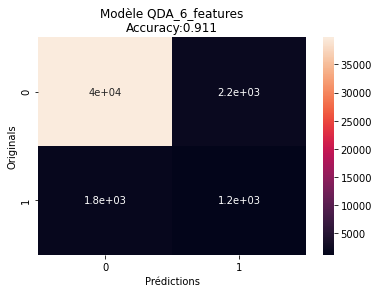

In [188]:
get_cm("QDA_6_features", y_test , y_pred2_opti)

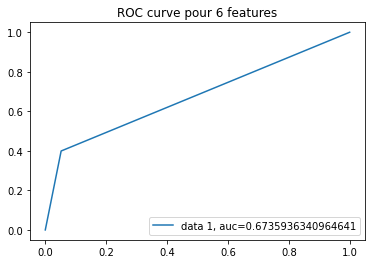

In [189]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred2_opti)
auc = metrics.roc_auc_score(y_test, y_pred2_opti)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC curve pour 6 features")
plt.show()

In [190]:
x_train3 = x_train.copy()
x_test3 = x_test.copy()

In [191]:
del x_train3["RevolvingUtilizationOfUnsecuredLines"]
del x_train3["NumberOfDependents"]
del x_train3["NumberRealEstateLoansOrLines"]
del x_train3["NumberOfOpenCreditLinesAndLoans"]
del x_train3["DebtRatio"]
del x_train3["MonthlyIncome"]

del x_test3["RevolvingUtilizationOfUnsecuredLines"]
del x_test3["NumberOfDependents"]
del x_test3["NumberRealEstateLoansOrLines"]
del x_test3["NumberOfOpenCreditLinesAndLoans"]
del x_test3["DebtRatio"]
del x_test3["MonthlyIncome"]

In [192]:
model_opti_qda3 = QuadraticDiscriminantAnalysis()
model_opti_qda3.fit(x_train3, y_train)
y_pred_opti3 = model_opti_qda3.predict(x_test3)
model_opti_qda3.score(x_test3, y_pred_opti3)

1.0

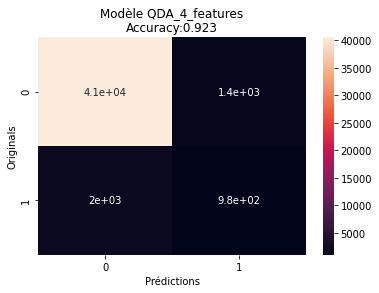

In [193]:
get_cm("QDA_4_features", y_test , y_pred_opti3)

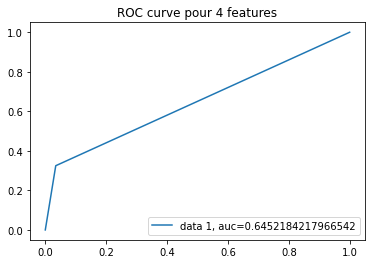

In [194]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_opti3)
auc = metrics.roc_auc_score(y_test, y_pred_opti3)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC curve pour 4 features")
plt.show()

### Dernier modèle

In [195]:
mod = QuadraticDiscriminantAnalysis()
mod.fit(x_train, y_train)
y_pre = mod.predict(x_test)
mod.score(x_test, y_test)

0.8971111111111111

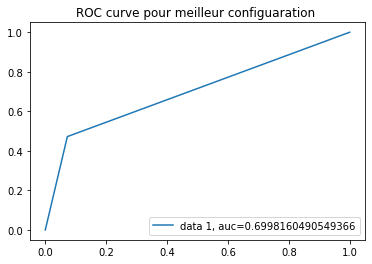

In [196]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pre)
auc = metrics.roc_auc_score(y_test, y_pre)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC curve pour meilleur configuaration ")
plt.show()

### Data viz

In [210]:
d = pd.read_excel('Dataset_light.xlsx',index_col=0)  
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Index,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0


<AxesSubplot:>

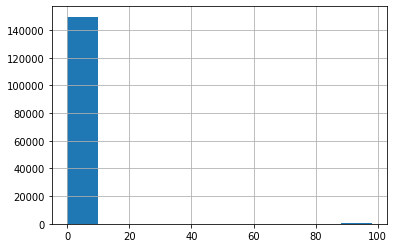

In [211]:
d["NumberOfTime30-59DaysPastDueNotWorse"].hist()

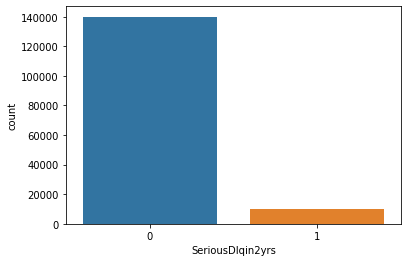

In [212]:
sns.countplot(x='SeriousDlqin2yrs',data=d)
plt.show()

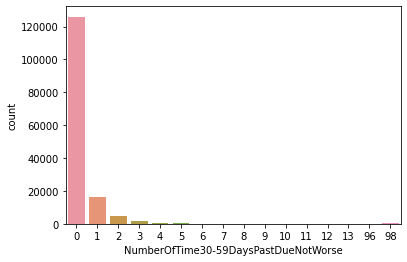

In [213]:
sns.countplot(x='NumberOfTime30-59DaysPastDueNotWorse',data=d)
plt.show()

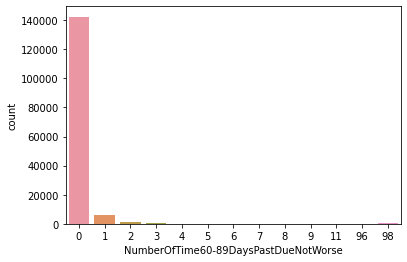

In [214]:
sns.countplot(x='NumberOfTime60-89DaysPastDueNotWorse',data=d)
plt.show()

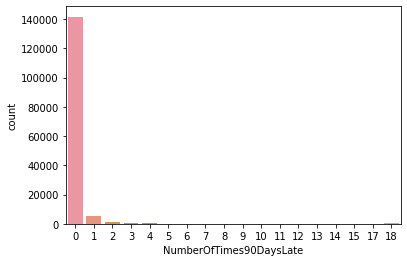

In [216]:
sns.countplot(x='NumberOfTimes90DaysLate',data=df)
plt.show()